<table align="left" width=100%>
    <tr>
        <td width="20%">
            <img src="faculty.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Assignment Questions </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Total Marks:  30 Marks


### About the data set (Movie_Reviews)

The dataset contains Movie reviews. The aim of this assignment is to classsify the review texts into two categories. 

Attribute information: 
 
Dataset has two columns:
Column1: Review Text
Column2: Two Classes. Positive and negative.

## Table of Content

1. **[Import Libraries](#lib)**
2. **[Load the Data  (5 Marks)](#prep)**
    - 2.1 - **[Read the Data   (1 Mark)](#read)**
    - 2.2 - **[Dispay the first ten rows (1 Mark) ](#dtype)**
    - 2.3 - **[Display the information about the data (1 Mark)](#drop)**
    - 2.4 - **[Encode the sentiment column values as 1 or 0 (2 Marks)](#dummy)**
3.  **[Data preprocessing  (7 Marks)](#prep)**
    - 3.1 - **[Remove special characters and html tags (2 Marks)](#read)**
    - 3.2 - **[Convert reviews into lowercase (1 Mark)](#dtype)**
    - 3.3 - **[Removal of stop words (2 Marks)](#drop)**
    - 3.4 - **[Apply stemming (2 Marks)](#dummy)**
4.**[Convert review text into feature vector and classification (18 Marks)](#prep)**
    - 4.1 - **[create BOW model (2 Marks)](#cut_off)**
    - 4.2 - **[Training data and Test data -split  (1 Mark)](#dtype)**
    - 4.3 - **[Define the Classification model (any one like NB, SVM or Random forest) train the model  (3 Marks) ](#drop)**
    - 4.4 - **[Classification metrics analysis (2 Marks)](#dummy)**
    - 4.5 - **[predict the class for your own review (2 Marks)](#dummy)**

    - 4.6 - **[create feature vector using tf-idf  (2 Marks)](#cut_off)**
    - 4.7 - **[Define the Classification model (any one like NB, SVM or Random forest) train the model (2 Marks)](#drop)**
    - 4.8 - **[Classification metrics analysis (2 Marks)](#dummy)**
    - 4.9 - **[predict the class for your own review (2 Marks) ](#dummy)**

        

<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [3]:
import nltk
from six import string_types
from string import punctuation
from nltk.corpus import stopwords
from nltk import word_tokenize
import numpy as np
import pandas as pd
from gensim.parsing.preprocessing import remove_stopwords,PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from bs4 import BeautifulSoup
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


2. Load the Data

2.1 Read the data

In [4]:
movie_reviews=pd.read_csv('Movie_reviews.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Movie_reviews.csv'

In [1]:
type(movie_reviews)

NameError: name 'movie_reviews' is not defined

2.2 Dispay the first ten rows

In [3]:
movie_reviews.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


2.3 Display the information about the data

In [4]:
movie_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


2.4   Encode the sentiment column values as 1 or 0

In [5]:
y=pd.get_dummies(movie_reviews['sentiment'],drop_first=True)
y

,positive
0,1
1,1
2,1
3,0
4,1
...,...
49995,1
49996,0
49997,0
49998,0


3.  Data preprocessing

3.1 Remove special characters and html tags

In [6]:
##  remove special character and html tags
reviews_html_removed=movie_reviews['review'].str.replace('<.*?>', '')
messages = reviews_html_removed.str.replace('[^a-zA-Z\s]', '')
messages


0        One of the other reviewers has mentioned that ...
1        A wonderful little production The filming tech...
2        I thought this was a wonderful way to spend ti...
3        Basically theres a family where a little boy J...
4        Petter Matteis Love in the Time of Money is a ...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot bad dialogue bad acting idiotic direc...
49997    I am a Catholic taught in parochial elementary...
49998    Im going to have to disagree with the previous...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

3.2 - Convert reviews into lowercase

In [7]:
messages=messages.str.lower()
messages

0        one of the other reviewers has mentioned that ...
1        a wonderful little production the filming tech...
2        i thought this was a wonderful way to spend ti...
3        basically theres a family where a little boy j...
4        petter matteis love in the time of money is a ...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    im going to have to disagree with the previous...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

3.3 - Removal of stop words

In [8]:
docs = messages.apply(remove_stopwords)

In [9]:
docs

0        reviewers mentioned watching oz episode youll ...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically theres family little boy jake thinks...
4        petter matteis love time money visually stunni...
                               ...                        
49995    thought movie right good job wasnt creative or...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    im going disagree previous comment maltin seco...
49999    expects star trek movies high art fans expect ...
Name: review, Length: 50000, dtype: object

3.4 - Apply stemming

In [10]:
ps = PorterStemmer()
docs = ps.stem_documents(docs)

We have used PorterStemmer, which is a process for removing the commoner morphological and inflexional endings from words in English.

4.  Convert review text into feature vector and classification

4.1 - create BOW model 

Count vectorizer means breaking down a sentence or any texts into words by performing preprocessing tasks like converting all words to lowercase,thus removing special characters.

In [11]:
# Creating the Bag of Words model
cv = CountVectorizer(max_features=3500)
X = cv.fit_transform(docs).toarray()

4.2 - Training data and Test data -split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [13]:
X_train.shape

(40000, 3500)

4.3 - Define the Classification model (any one like NB, SVM or Random forest) train the model

In [14]:
# Training model using Naive bayes classifier
review_classify_model = MultinomialNB().fit(X_train, y_train)


In [ ]:


Total mails -12
spam - 4 p(spam) - 4/12 - 0.3
NOt spam - 8 - p(non spam) - 8/12 - 0.7
Dear - 17/50 - 0.6 (non spam) p(dear)
Dear - 3/50 - 0.1 (spam) p(dear)
friend - 0/50 - 0.8 (non spam) p(friend)
friend - 2/50 - 0.2 (spam) p(firend)



Dear Friend
0.1*0.2*0.3 = 0.006 - spam
Dear Friend
0.7 *0* 0.6 = 0 - Non Spam


4.4  Classification metrics analysis and plot the confusion matrix

Training performance
Training accuracy score 0.843
              precision    recall  f1-score   support

           0       0.84      0.85      0.84     19965
           1       0.85      0.84      0.84     20035

    accuracy                           0.84     40000
   macro avg       0.84      0.84      0.84     40000
weighted avg       0.84      0.84      0.84     40000

confusion_matrix [[16917  3048]
 [ 3231 16804]]


<AxesSubplot:>

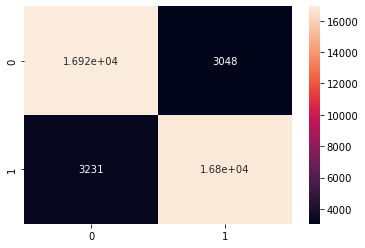

In [15]:
# training data performance metrics
ypred_train=review_classify_model.predict(X_train)

print("Training performance")
print("Training accuracy score %.3f" % accuracy_score(y_train,ypred_train))
print(classification_report(y_train,ypred_train))
print('confusion_matrix',confusion_matrix(y_train,ypred_train))
sns.heatmap(confusion_matrix(y_train,ypred_train),annot=True,fmt=".4g")

Testing performance
Testing accuracy score 0.831
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      5035
           1       0.83      0.83      0.83      4965

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

confusion_matrix [[4214  821]
 [ 865 4100]]


<AxesSubplot:>

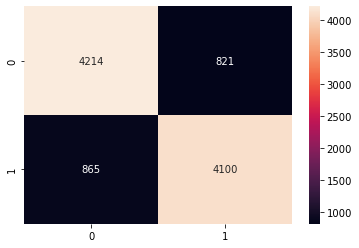

In [16]:
# testing accuarcy

ypred_test=review_classify_model.predict(X_test)

print("Testing performance")
print("Testing accuracy score %.3f" % accuracy_score(y_test,ypred_test))
print(classification_report(y_test,ypred_test))
print('confusion_matrix',confusion_matrix(y_test,ypred_test))
sns.heatmap(confusion_matrix(y_test,ypred_test),annot=True,fmt=".4g")



Inference:
    
    In train data 84% cases where model has predicted the reviews as negative sentiment were correct and 85% cases where 
    model has predicted the reviews as positive sentiment were correct.
    
    In test data 83% cases where model has predicted the reviews as negative sentiment were correct and 83% cases where 
    model has predicted the reviews as positive sentiment were correct.
    
    Using the confusion matrix, True positive, False Positive,True Negative, False Negative  can be extracted.
    
    Accuracy score seems to be good in both training and testing data and it is good model. There is no overfitting and             underfitting model issue.
    
    Both train and test data have nearly same accuracy level of 0.83.
    
  

4.5 - predict the class for your own review

4.6 - create feature vector using tf-idf

TF-IDF vectorizer: 
    It is calculating the TF-IDF score for every word in the corpus relative to the document and then putting that information into a vector.

In [17]:
tv = TfidfVectorizer(max_features=3500)
X1 = tv.fit_transform(docs).toarray()

In [18]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size = 0.20, random_state = 0)

4.7 Define the Classification model (any one like NB, SVM or Random forest) train the model

In [19]:
tfidf_model = MultinomialNB().fit(X_train1, y_train1)

4.8 - Classification metrics analysis

Training performance
Training accuracy score 0.841
              precision    recall  f1-score   support

           0       0.86      0.82      0.84     19965
           1       0.83      0.87      0.85     20035

    accuracy                           0.84     40000
   macro avg       0.84      0.84      0.84     40000
weighted avg       0.84      0.84      0.84     40000

confusion_matrix [[16284  3681]
 [ 2665 17370]]


<AxesSubplot:>

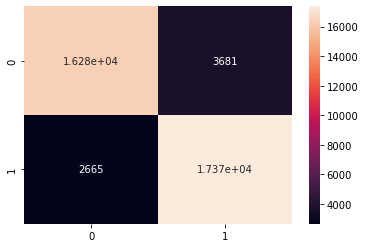

In [20]:
# training data performance metrics
ypred_train1=review_classify_model.predict(X_train1)
print("Training performance")
print("Training accuracy score %.3f" % accuracy_score(y_train1,ypred_train1))
print(classification_report(y_train1,ypred_train1))
print('confusion_matrix',confusion_matrix(y_train1,ypred_train1))
sns.heatmap(confusion_matrix(y_train1,ypred_train1),annot=True,fmt=".4g")

Testing performance
Testing accuracy score 0.829
              precision    recall  f1-score   support

           0       0.85      0.80      0.83      5035
           1       0.81      0.85      0.83      4965

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

confusion_matrix [[4048  987]
 [ 727 4238]]


<AxesSubplot:>

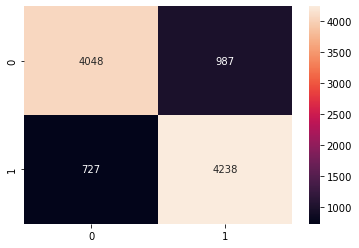

In [21]:
# testing accuarcy

ypred_test1=review_classify_model.predict(X_test1)

print("Testing performance")
print("Testing accuracy score %.3f" % accuracy_score(y_test1,ypred_test1))
print(classification_report(y_test1,ypred_test1))
print('confusion_matrix',confusion_matrix(y_test1,ypred_test1))
sns.heatmap(confusion_matrix(y_test1,ypred_test1),annot=True,fmt=".4g")

Inference:
    
    In train data 86% cases where model has predicted the reviews as negative sentiment were correct and 83% cases where model has predicted the reviews as positive sentiment were correct.
    
    In test data 85% cases where model has predicted the reviews as negative sentiment were correct and 81% cases where model has predicted the reviews as positive sentiment were correct.
    
    Using the confusion matrix, True positive, False Positive,True Negative, False Negative  can be extracted.
    
    Accuracy score seems to be good in both training and testing data and it is good model. There is no overfitting and             underfitting model issue.
    
    Both train and test data have nearly same accuracy level of 0.83.
    

Using Count vectorizer and Tfidf vectorizer, both model gives almost same level of accuracy.

4.9 - predict the class for your own review

In [17]:
#importing necessary libraries
import requests
import json

#url of the ipynb file  
url = 'https://raw.githubusercontent.com/aakashsuresh77/NLP/main/nlp3.ipynb'

#requesting the content from the url
r = requests.get(url)

#loading the content into json
data = json.loads(r.content)

#printing the code
for cells in data['cells']:
    for cell in cells['source']:
        print(cell)

# Natural Language Processing - CT3 Project
## Fake news identification- Total marks (30)
### About the data set 



A full  dataset with the following attributes:





####  data:

**id:**  unique id for a news article<br>

**title:** the title of a news article <br> 

**author:**  author of the news article<br>

**text:** the text of the article; could be incomplete<br>





**label** - (Output variable) a label that marks the article as potentially unreliable <br>

1: unreliable <br>

0: reliable





Note: Remove the unneccssary data like description
# Table of Content



1. Data Preprocessing - **2 Marks**

2. Feature extraction - **3 Marks**

3. Design a LSTM Model - **5 Marks**

4. Test the Model - own data - **3 Marks**

5. Build the following models <br>

   Design Bideirectional LSTM - **5 Marks**<br>

   Design RNN (2 Layers) - **5 Marks**

6. Compare the Results of all above models - **2 Marks**

7. Intrepret your solution based on the results - **5 Marks**

<a id="logreg">

In [14]:

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

#example1
word1 = "classes"
stem1 = stemmer.stem(word1)
print("stem of the word 'flying' is:",stem1)

#example2
word2 = "happiness"
stem2 = stemmer.stem(word2)
print("stem of the word 'happiness' is:",stem2)


from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 

#example1
word1 = "classes"
lem1 = lemmatizer.lemmatize(word1)
print("lemmatization of the word 'flying' is:",lem1)

#example2
word2 = "happiness"
lem2 = lemmatizer.lemmatize(word2)
print("lemmatization of the word 'happiness' is:",lem2)

stem of the word 'flying' is: class
stem of the word 'happiness' is: happi
lemmatization of the word 'flying' is: class
lemmatization of the word 'happiness' is: happiness
